# 🐫 CAMEL VLM Agent

In [1]:
import os
from getpass import getpass
import matplotlib.pyplot as plt
# Prompt for the API key securely
os.environ["OPENAI_API_KEY"] = "PUT YOUR API TOKEN HERE"

In [2]:
from camel.agents import ChatAgent
from camel.configs import ChatGPTConfig
from camel.messages import BaseMessage
from camel.types import ModelType, ModelPlatformType
from camel.types.enums import RoleType
from camel.models import ModelFactory


sys_msg = BaseMessage.make_assistant_message(
    role_name="Assistant",
    content="You're a helpful assistant",
)

# Set model
model=ModelFactory.create(
    model_platform=ModelPlatformType.OPENAI,
    model_type=ModelType.GPT_4O,
    model_config_dict=ChatGPTConfig(temperature=0.6).as_dict(),
)

# Set agent
vlm_agent = ChatAgent(
    sys_msg,
    model=model
)

2024-12-09 06:55:15,463 - camel - INFO - Camel library logging has been configured.


### Ollama VLM

In [3]:
from camel.agents import ChatAgent
from camel.configs import ChatGPTConfig
from camel.messages import BaseMessage
from camel.types import ModelType, ModelPlatformType
from camel.types.enums import RoleType
from camel.models import ModelFactory


sys_msg = BaseMessage.make_assistant_message(
    role_name="Assistant",
    content="You're a helpful assistant",
)

# Set model
model=ModelFactory.create(
    model_platform=ModelPlatformType.OLLAMA,
    model_type='llava',
    url='http://localhost:11434/v1',
)

# Set agent
vlm_agent = ChatAgent(
    sys_msg,
    model=model
)

2024-12-09 06:55:16,850 - root - WARNING - Invalid or missing `max_tokens` in `model_config_dict`. Defaulting to 999_999_999 tokens.


## Initialize MineDojo 

In [4]:
# import minedojo

# minedojo.make(
#         task_id="harvest_1_log",
#         image_size=(288, 512),
#         world_seed=23,
#         seed=42,
#     )

In [5]:
import minedojo
import numpy as np
from PIL import Image

# Add MINEDOJO_HEADLESS=1 to your environment variables to run this script headless
os.environ["MINEDOJO_HEADLESS"] = "1" 
 
env = minedojo.make(
        task_id="harvest_1_log",
        image_size=(288, 512),
        world_seed=23,
        seed=42,
    )
task_prompt, task_guidance = minedojo.tasks.ALL_PROGRAMMATIC_TASK_INSTRUCTIONS['harvest_1_log']
print('task_prompt:', task_prompt)
print('task_guidance:', task_guidance)

print(f"[INFO] Create a task with prompt: {env.task_prompt}")

[INFO:minedojo.tasks] Loaded 1572 Programmatic tasks, 1558 Creative tasks, and 1 special task: "Playthrough". Totally 3131 tasks loaded.


2024-12-09 06:55:21,610 - minedojo.tasks - INFO - Loaded 1572 Programmatic tasks, 1558 Creative tasks, and 1 special task: "Playthrough". Totally 3131 tasks loaded.
task_prompt: obtain log
task_guidance: 1. Find a tree.
2. Cut the tree down with an axe.
3. Collect the logs that appear.
[INFO] Create a task with prompt: obtain log


/home/aslathe/miniconda3/envs/minecraft/lib/python3.10/site-packages/numpy/core/numeric.py:330: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')


## Initialize the OASIS 

Please refer to [open-oasis](open-oasis/README.md) for oasis model download. 

In [100]:
os.getcwd()

'/home/aslathe/Miscellaneous/Collection/Demos/minecraft/alpha-craft/mcts_action/demo'

In [109]:
import sys
import os

# Add the parent directory to sys.path
parent_directory = os.path.abspath(os.path.join(os.getcwd(), '../../../', 'alpha-craft/open-oasis'))
sys.path.append(parent_directory)
parent_directory = os.path.abspath(os.path.join(os.getcwd(), '../'))
sys.path.append(parent_directory)
parent_directory = os.path.abspath(os.path.join(os.getcwd(), '../../../', 'alpha-craft/agent'))
sys.path.append(parent_directory)


In [110]:
print(sys.path)

['/home/aslathe/miniconda3/envs/minecraft/lib/python310.zip', '/home/aslathe/miniconda3/envs/minecraft/lib/python3.10', '/home/aslathe/miniconda3/envs/minecraft/lib/python3.10/lib-dynload', '', '/home/aslathe/miniconda3/envs/minecraft/lib/python3.10/site-packages', '/home/aslathe/miniconda3/envs/minecraft/lib/python3.10/site-packages/setuptools/_vendor', '/home/aslathe/Miscellaneous/Collection/Demos/minecraft/alpha-craft/open-oasis', '/tmp/tmpqcnu45pa', '/home/aslathe/Miscellaneous/Collection/Demos/minecraft/alpha-craft/open-oasis', '/home/aslathe/Miscellaneous/Collection/Demos/minecraft/alpha-craft/mcts_action', '/home/aslathe/Miscellaneous/Collection/Demos/minecraft/alpha-craft/open-oasis', '/home/aslathe/Miscellaneous/Collection/Demos/minecraft/alpha-craft/mcts_action', '/home/aslathe/Miscellaneous/Collection/Demos/minecraft/alpha-craft/open-oasis', '/home/aslathe/Miscellaneous/Collection/Demos/minecraft/alpha-craft/mcts_action', '/home/aslathe/Miscellaneous/Collection/Demos/minecra

In [9]:
import torch
from open_oasis.world_model import WorldModel

oasis_ckpt = "/home/aslathe/.cache/huggingface/hub/models--Etched--oasis-500m/snapshots/4ca7d2d811f4f0c6fd1d5719bf83f14af3446c0c/oasis500m.safetensors"
vae_ckpt = "/home/aslathe/.cache/huggingface/hub/models--Etched--oasis-500m/snapshots/4ca7d2d811f4f0c6fd1d5719bf83f14af3446c0c/vit-l-20.safetensors"


world_model = WorldModel(
    oasis_ckpt=oasis_ckpt,
    vae_ckpt=vae_ckpt,
    num_frames=32,
    n_prompt_frames=1,
    ddim_steps=10,
    fps=20,
    scaling_factor=0.07843137255,
    max_noise_level=1000,
    noise_abs_max=20,
    stabilization_level=15,
    seed=0,
    device="cuda:0"
)

/home/aslathe/miniconda3/envs/minecraft/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading Oasis-500M from /home/aslathe/.cache/huggingface/hub/models--Etched--oasis-500m/snapshots/4ca7d2d811f4f0c6fd1d5719bf83f14af3446c0c/oasis500m.safetensors...
Loading ViT-VAE-L/20 from /home/aslathe/.cache/huggingface/hub/models--Etched--oasis-500m/snapshots/4ca7d2d811f4f0c6fd1d5719bf83f14af3446c0c/vit-l-20.safetensors...


## Run single step in the OASIS and MineDojo

In [22]:
task_prompt, task_guidance = minedojo.tasks.ALL_PROGRAMMATIC_TASK_INSTRUCTIONS['harvest_1_log']
print('task_prompt:', task_prompt)
print('task_guidance:', task_guidance)

print(f"[INFO] Create a task with prompt: {env.task_prompt}")

obs = env.reset()

obs_img = np.array(obs['rgb'])
obs_img = np.transpose(obs_img, (1, 2, 0))

image = Image.fromarray(obs_img.astype('uint8'))

task_prompt: obtain log
task_guidance: 1. Find a tree.
2. Cut the tree down with an axe.
3. Collect the logs that appear.
[INFO] Create a task with prompt: obtain log


(-0.5, 511.5, 287.5, -0.5)

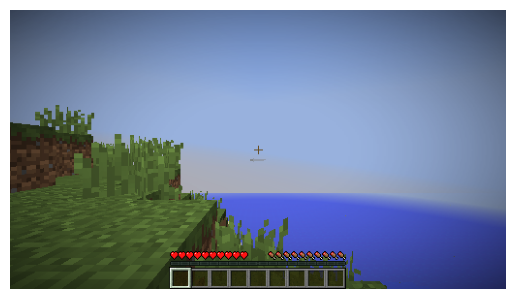

In [23]:
# show the image
plt.imshow(image)
plt.axis('off')

Generating frames:   0%|          | 0/7 [00:00<?, ?it/s]

Generating frames: 100%|██████████| 7/7 [00:04<00:00,  1.54it/s]


(-0.5, 639.5, 359.5, -0.5)

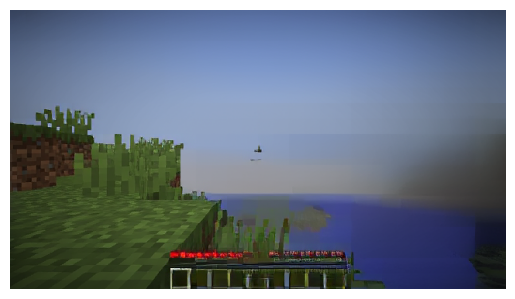

In [26]:
# Use OASIS world model to guess the next state
prompt_tensor = torch.tensor(obs_img).permute(2, 0, 1).unsqueeze(0).float()
# Camera is quantized to [0-79] for both x and y, 40 means no movement
action_dict = {"move_forward": 1, "camera": [40,40]}
next_state = world_model.step_single_action(prompt_tensor, action_dict)

# Display the next state
# next_state_img = np.transpose(next_state, (1, 2, 0))
next_state_image = Image.fromarray(next_state)

# show the image
plt.imshow(next_state_image)
plt.axis('off')

Keys of obs: dict_keys(['rgb', 'inventory', 'equipment', 'life_stats', 'location_stats', 'nearby_tools', 'damage_source', 'voxels', 'masks', 'delta_inv'])


(-0.5, 511.5, 287.5, -0.5)

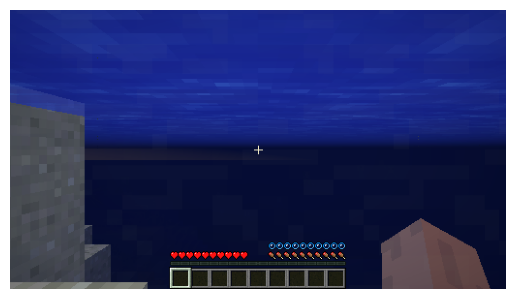

In [38]:
# Run the same action in the minedojo environment
action = env.action_space.no_op()  # empty action
action[0] = 1  # move forward
obs, reward, done, info = env.step(action)
# print("obs:", obs["rgb"])
print("Keys of obs:", obs.keys())

obs_img = np.array(obs["rgb"])
obs_img = np.transpose(obs_img, (1, 2, 0))

image = Image.fromarray(obs_img.astype("uint8"))
plt.imshow(image)
plt.axis("off")

### Verifying Everything works

In [72]:
from vf_agent import ValueFunctionAgent
import importlib
importlib.reload(vf_agent)
from vf_agent import ValueFunctionAgent

In [73]:

task_desc = f"""
{task_prompt}
{task_guidance}
"""
print(task_desc)


obtain log
1. Find a tree.
2. Cut the tree down with an axe.
3. Collect the logs that appear.



In [80]:
print(os.getcwd())

/home/aslathe/Miscellaneous/Collection/Demos/minecraft/alpha-craft/mcts_action/demo


In [81]:
import logging

# Configure logging
logging.basicConfig(filename='/home/aslathe/Miscellaneous/Collection/Demos/minecraft/alpha-craft/mcts_action/demo/error_log.txt', 
                    level=logging.ERROR,  # Capture errors (ERROR, CRITICAL)
                    format='%(asctime)s - %(levelname)s - %(message)s')

(-0.5, 511.5, 287.5, -0.5)

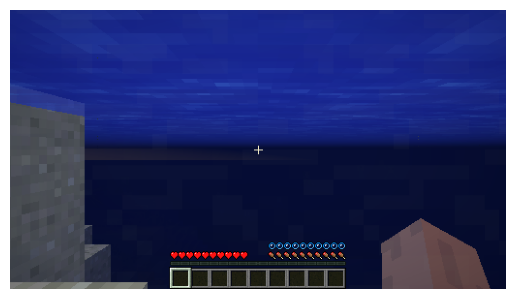

In [92]:
image = Image.fromarray(obs_img.astype("uint8"))
plt.imshow(image)
plt.axis("off")

In [94]:
import io
# pil_image = Image.fromarray(obs_img.astype('uint8'))
pil_image = Image.fromarray(obs_img.astype("uint8"))
byte_io = io.BytesIO()
pil_image.save(byte_io, format='PNG')
byte_io.seek(0)  # Reset pointer

# Load it back into a PIL Image (with format set to PNG)
image_with_format = Image.open(byte_io)

# Check the format of the image
print(image_with_format.format) 

PNG


2024-12-10 07:05:48,234 - root - WARNING - Invalid or missing `max_tokens` in `model_config_dict`. Defaulting to 999_999_999 tokens.
obs_hist: [<PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x288 at 0x7F20FC0E2920>]
act_hist: [{'move_forward': 1, 'camera': [40, 40]}]

        Action History: [{'move_forward': 1, 'camera': [40, 40]}]
        The images corresponding to the observation history of the last 1 actions. The LAST IMAGE represents the current state of the player agent in the game.
        
2024-12-10 07:05:49,278 - httpx - INFO - HTTP Request: POST http://localhost:11434/v1/chat/completions "HTTP/1.1 200 OK"
2024-12-10 07:05:49,280 - camel.agents.chat_agent - INFO - Model llava, index 0, processed these messages: [{'role': 'system', 'content': '\n         You are an expert in evaluating the performance of a player agent in Minecraft. \n         The player agent has the goal to complete a task: \nobtain log\n1. Find a tree.\n2. Cut the tree down with an axe.\n3. Collec
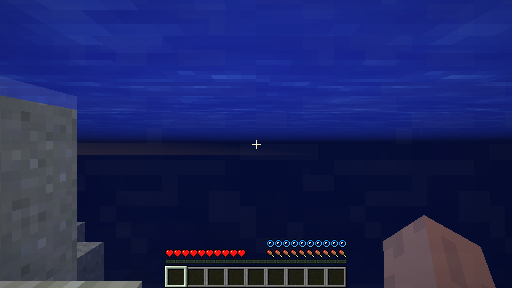

1.0

In [96]:

from vf_agent import ValueFunctionAgent
import importlib
importlib.reload(vf_agent)
from vf_agent import ValueFunctionAgent
ValueFunctionAgent(task_desc=task_desc).eval(obs_hist=[image_with_format], act_hist=[action_dict])

In [128]:
import agent_node
import importlib
importlib.reload(agent_node)
import agent_node

In [130]:
from vf_agent import ValueFunctionAgent
from monte_carlo_tree_search import MCTS
from agent_node import Node
%load_ext autoreload
%autoreload 2

In [137]:
Node(state={'action': '', 'observation': image_with_format}, parent=None).find_children()

2024-12-13 13:45:04,367 - root - WARNING - Invalid or missing `max_tokens` in `model_config_dict`. Defaulting to 999_999_999 tokens.
agent_node.py:find_random_child len(self.children)  36
node.state['observation']:  tensor([[[[ 22.,  22.,  22.,  ...,  26.,  26.,  26.],
          [ 22.,  22.,  22.,  ...,  26.,  26.,  26.],
          [ 22.,  22.,  22.,  ...,  26.,  26.,  26.],
          ...,
          [120., 120., 120.,  ...,   5.,   5.,   5.],
          [119., 119., 120.,  ...,   5.,   5.,   5.],
          [119., 119., 119.,  ...,   5.,   5.,   5.]],

         [[ 36.,  36.,  36.,  ...,  40.,  40.,  40.],
          [ 36.,  36.,  36.,  ...,  40.,  40.,  40.],
          [ 36.,  36.,  36.,  ...,  40.,  40.,  40.],
          ...,
          [120., 120., 120.,  ...,  10.,  10.,  10.],
          [119., 119., 120.,  ...,  10.,  10.,  10.],
          [119., 119., 119.,  ...,  10.,  10.,  10.]],

         [[121., 121., 121.,  ..., 124., 124., 124.],
          [121., 121., 121.,  ..., 124., 124., 1

Generating frames: 100%|██████████| 7/7 [00:05<00:00,  1.39it/s]


agent_node.py:find_random_child len(self.children)  36
node.state['observation']:  tensor([[[[ 22.,  22.,  22.,  ...,  26.,  26.,  26.],
          [ 22.,  22.,  22.,  ...,  26.,  26.,  26.],
          [ 22.,  22.,  22.,  ...,  26.,  26.,  26.],
          ...,
          [120., 120., 120.,  ...,   5.,   5.,   5.],
          [119., 119., 120.,  ...,   5.,   5.,   5.],
          [119., 119., 119.,  ...,   5.,   5.,   5.]],

         [[ 36.,  36.,  36.,  ...,  40.,  40.,  40.],
          [ 36.,  36.,  36.,  ...,  40.,  40.,  40.],
          [ 36.,  36.,  36.,  ...,  40.,  40.,  40.],
          ...,
          [120., 120., 120.,  ...,  10.,  10.,  10.],
          [119., 119., 120.,  ...,  10.,  10.,  10.],
          [119., 119., 119.,  ...,  10.,  10.,  10.]],

         [[121., 121., 121.,  ..., 124., 124., 124.],
          [121., 121., 121.,  ..., 124., 124., 124.],
          [121., 121., 122.,  ..., 124., 124., 124.],
          ...,
          [118., 118., 118.,  ...,  41.,  41.,  40.],
    

Generating frames: 100%|██████████| 7/7 [00:05<00:00,  1.39it/s]


agent_node.py:find_random_child len(self.children)  36
node.state['observation']:  tensor([[[[ 22.,  22.,  22.,  ...,  26.,  26.,  26.],
          [ 22.,  22.,  22.,  ...,  26.,  26.,  26.],
          [ 22.,  22.,  22.,  ...,  26.,  26.,  26.],
          ...,
          [120., 120., 120.,  ...,   5.,   5.,   5.],
          [119., 119., 120.,  ...,   5.,   5.,   5.],
          [119., 119., 119.,  ...,   5.,   5.,   5.]],

         [[ 36.,  36.,  36.,  ...,  40.,  40.,  40.],
          [ 36.,  36.,  36.,  ...,  40.,  40.,  40.],
          [ 36.,  36.,  36.,  ...,  40.,  40.,  40.],
          ...,
          [120., 120., 120.,  ...,  10.,  10.,  10.],
          [119., 119., 120.,  ...,  10.,  10.,  10.],
          [119., 119., 119.,  ...,  10.,  10.,  10.]],

         [[121., 121., 121.,  ..., 124., 124., 124.],
          [121., 121., 121.,  ..., 124., 124., 124.],
          [121., 121., 122.,  ..., 124., 124., 124.],
          ...,
          [118., 118., 118.,  ...,  41.,  41.,  40.],
    

Generating frames: 100%|██████████| 7/7 [00:04<00:00,  1.43it/s]


obs_hist: [tensor([[[[ 22.,  22.,  22.,  ...,  26.,  26.,  26.],
          [ 22.,  22.,  22.,  ...,  26.,  26.,  26.],
          [ 22.,  22.,  22.,  ...,  26.,  26.,  26.],
          ...,
          [120., 120., 120.,  ...,   5.,   5.,   5.],
          [119., 119., 120.,  ...,   5.,   5.,   5.],
          [119., 119., 119.,  ...,   5.,   5.,   5.]],

         [[ 36.,  36.,  36.,  ...,  40.,  40.,  40.],
          [ 36.,  36.,  36.,  ...,  40.,  40.,  40.],
          [ 36.,  36.,  36.,  ...,  40.,  40.,  40.],
          ...,
          [120., 120., 120.,  ...,  10.,  10.,  10.],
          [119., 119., 120.,  ...,  10.,  10.,  10.],
          [119., 119., 119.,  ...,  10.,  10.,  10.]],

         [[121., 121., 121.,  ..., 124., 124., 124.],
          [121., 121., 121.,  ..., 124., 124., 124.],
          [121., 121., 122.,  ..., 124., 124., 124.],
          ...,
          [118., 118., 118.,  ...,  41.,  41.,  40.],
          [117., 117., 118.,  ...,  40.,  40.,  40.],
          [117., 117.,
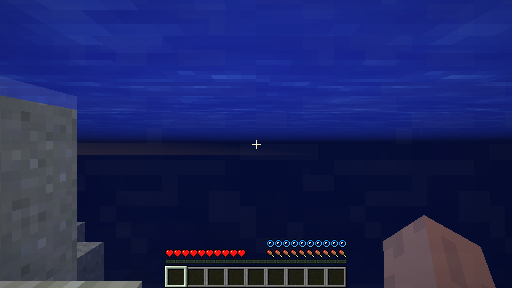
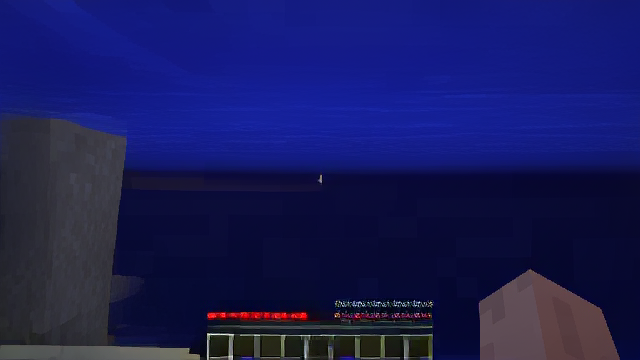
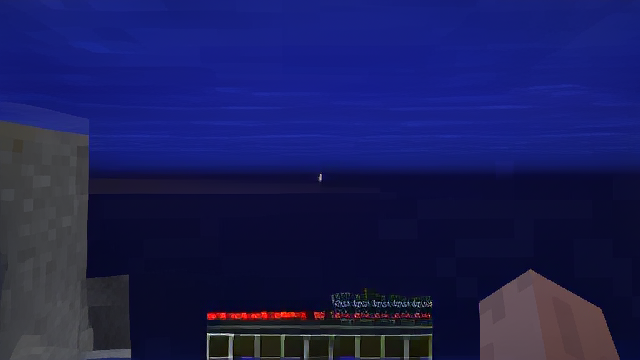
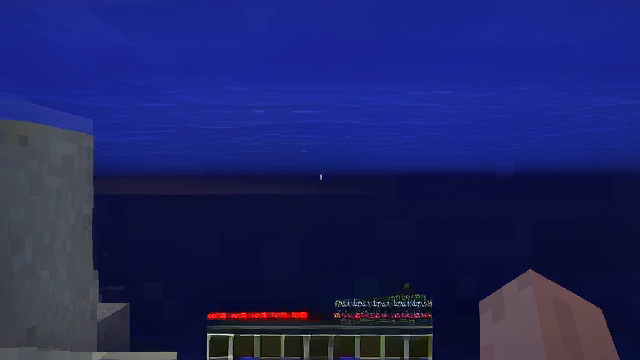

AttributeError: 'str' object has no attribute 'dim'

In [164]:
value_agent = ValueFunctionAgent(task_desc=task_desc)#.eval(obs_hist=[image_with_format], act_hist=[action_dict])
oasis_img_input_tensor = torch.tensor(np.array(image_with_format)).float().permute(2, 0, 1).unsqueeze(0)
mcts_start_node = Node(state={'action': '', 'observation': oasis_img_input_tensor}, parent=None)
tree = MCTS(world_model, value_agent)
for _ in range(20):
    tree.do_rollout(mcts_start_node)
    print('Rollout done')

# TODO: do proper action mapping
# Get action
action = tree.choose(mcts_start_node).state['action'] 

In [151]:
value_agent

In [147]:
torch.tensor(np.array(image_with_format)).float().permute(2, 0, 1).unsqueeze(0)

torch.Size([1, 3, 288, 512])

In [ ]:
# Close the environment
env.close()